In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from moscot.problems.label_transfer import LabelProblem

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/docrep/decorators.py:43: SyntaxWarning: 'dataset.parameters' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [4]:
adata_2019 = sc.read("/storage/groups/ml01/workspace/dominik.klein/pancreas_2019/GSE132188_adata.h5ad.h5")

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [5]:
adata_2022 = sc.read("/storage/groups/ml01/workspace/dominik.klein/scMultiome_NVF/scMultiome_NVF_E14-E15/E14-E15_adata_filtered_rmDoublets_sctNormalized_WNN_embedded_initialAnno.h5ad")

In [6]:
adata_19 = adata_2019[adata_2019.obs["day"].isin(("14.5", "15.5"))].copy()
del adata_2019

In [7]:
adata_2022.obs["day"] = adata_2022.obs.apply(lambda x: "14.5" if x["sample"]=="E14.5" else "15.5", axis=1)

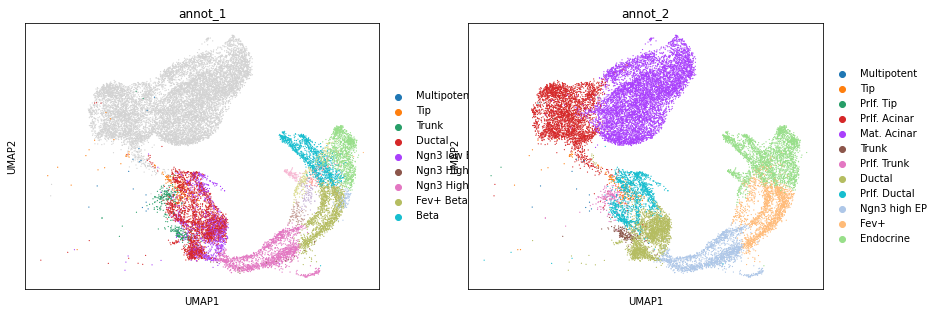

In [8]:
adata_19.obs["annot_1"] = adata_19.obs["clusters_fig6_alpha_final"].copy()
adata_19.obs["annot_2"] = adata_19.obs["clusters_fig3_final_noep"].copy()
sc.pl.umap(adata_19, color=["annot_1", "annot_2"])

In [9]:
adata_19.obs["celltype"] = np.where(~pd.isnull(adata_19.obs["annot_1"]), adata_19.obs["annot_1"], adata_19.obs["annot_2"])

In [10]:
pd.isnull(adata_19.obs["celltype"]).sum()

0

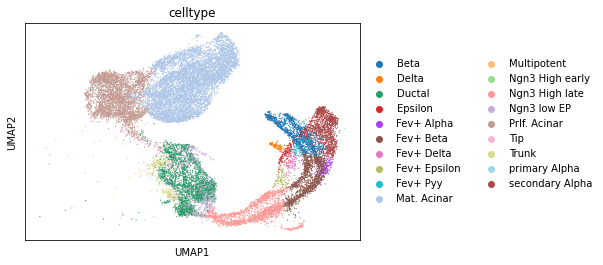

In [11]:
sc.pl.umap(adata_19, color=["celltype"])

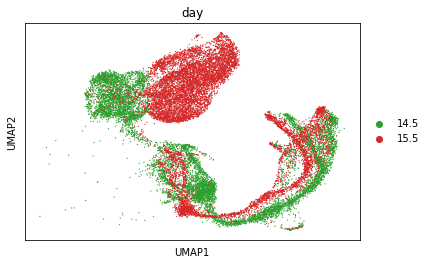

In [12]:
sc.pl.umap(adata_19, color=["day"])

In [13]:
common_genes= list(set(adata_19.var.index).intersection(adata_2022.var.index))

In [14]:
adata_19 = adata_19[:,common_genes]
adata_2022 = adata_2022[:,common_genes]

In [15]:
del adata_2022.layers

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/_core/anndata.py:739: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  self.layers = dict()


In [16]:
adata_2022

AnnData object with n_obs × n_vars = 16978 × 13255
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets',

In [17]:
sc.tl.umap(adata_2022)

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


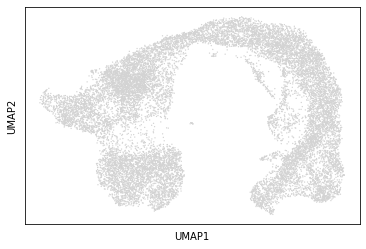

In [18]:
sc.pl.umap(adata_2022)

In [19]:
adata_2022

AnnData object with n_obs × n_vars = 16978 × 13255
    obs: 'n_counts', 'sample', 'int_id', 'reporter', 'log_cell_probs', 'cell_barcodes_du', 'cell_barcodes_cr', 'cell_barcodes', 'log_counts', 'n_genes', 'log_genes', 'mt_frac', 'rp_frac', 'ambi_frac', 'total_counts_rank', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS.enrichment', 'TSS.percentile', 'log_nCount_ATAC', 'log_nFeature_ATAC', 'scrublet_scores', 'scrublet_doublets', 'scrublet_doublets_cat', 'dd_doublets', 'dd_scores', 'dd_log_p_values', 'dd_voting_average', 'dd_-log_p_values', 'dd_doublets_cat', 'pANN', 'DF_classifications_1', 'DF_classifications_2', 'pANN_SCT', 'DF_SCT_classifications_1', 'DF_SCT_classifications_2', 'df_doublets',

In [20]:
adata_2022.obsm["X_umap_unlabelled"] = adata_2022.obsm["X_umap"]
adata_2022.uns["umap_unlabelled"] = adata_2022.uns["umap"]

In [21]:
adata = adata_19.concatenate(adata_2022, join="outer")

/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/home/icb/dominik.klein/miniconda3/envs/moscot_env_06/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [18]:
#del adata_19
#del adata_2022

In [19]:
#adata.obs = adata.obs[["day", "batch"]]

In [20]:
#adata.var = adata.var[["n_cells-0"]]

In [21]:
#adata.write("/home/icb/dominik.klein/tmp.h5ad")

In [22]:
#del adata_2019
#del adata_2022

In [23]:
#adata_0 = adata[adata.obs["day"]=="14.5"].copy()

In [22]:
adata.obs["batch"].value_counts()

0    20519
1    16978
Name: batch, dtype: int64

In [23]:
sc.pp.pca(adata, n_comps=30)

In [24]:
lp = LabelProblem(adata)
lp = lp.prepare("batch", joint_attr="X_pca", labelled_batch="0", batch_to_label="1")

In [25]:
lp.solve(scale_cost="mean", epsilon=1e-2, tau_a=0.9, tau_b=0.9)

In [26]:
adata.obs["celltype"] = adata.obs["celltype"].astype("category")

In [27]:
lp.transition_matrix(clusters_source="celltype", clusters_target="celltype")

,Acinar,Beta,Delta,Ductal,Epsilon,Fev+,Fev+ Alpha,Fev+ Beta,Fev+ Delta,Fev+ Epsilon,...,Ngn3 High cycling,Ngn3 High early,Ngn3 High late,Ngn3 low EP,Prlf. Acinar,Prlf. Trunk,Tip,Trunk,primary Alpha,secondary Alpha
Acinar,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00
Beta,1.613475e-07,9.568013e-01,3.607485e-01,0.0,0.0,1.049220e-01,2.681856e-01,5.427701e-01,0.0,1.257257e-01,...,5.460317e-03,3.004914e-03,2.277354e-02,3.958366e-04,8.038053e-13,4.328536e-08,0.0,0.0,0.0,1.304414e-01
Delta,1.771246e-08,4.302669e-03,2.350376e-01,0.0,0.0,1.180724e-04,2.219332e-03,2.489910e-03,0.0,7.733928e-03,...,3.667976e-08,1.465665e-04,7.198240e-04,5.361056e-06,2.753192e-11,7.948994e-09,0.0,0.0,0.0,4.359423e-03
Ductal,2.387789e-05,1.971843e-06,2.216052e-11,0.0,0.0,3.063378e-04,2.963536e-07,4.375766e-05,0.0,2.045240e-04,...,1.947263e-03,4.264956e-02,2.044438e-03,5.809249e-01,2.864614e-04,3.177356e-01,0.0,0.0,0.0,2.468431e-08
Epsilon,5.666181e-07,2.186531e-04,3.035122e-02,0.0,0.0,1.536813e-03,3.307027e-03,3.443068e-04,0.0,3.956553e-01,...,1.575402e-06,1.821145e-03,4.038815e-03,1.052181e-04,1.074733e-10,3.216890e-07,0.0,0.0,0.0,5.945695e-02
Fev+,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00
Fev+ Alpha,6.357681e-11,1.414558e-05,2.883339e-03,0.0,0.0,5.763547e-02,9.225178e-02,3.687823e-02,0.0,6.516826e-03,...,1.795922e-05,8.215445e-06,1.125935e-03,2.476771e-05,7.562777e-17,6.468357e-12,0.0,0.0,0.0,6.797316e-05
Fev+ Beta,2.441032e-08,1.601599e-03,2.861958e-02,0.0,0.0,7.564477e-01,2.450919e-01,3.102449e-01,0.0,1.191493e-01,...,3.006301e-04,3.279269e-03,2.648159e-01,5.361442e-04,5.812534e-12,2.065557e-09,0.0,0.0,0.0,1.081579e-03
Fev+ Delta,5.743196e-11,6.442996e-05,4.541721e-02,0.0,0.0,8.331666e-03,2.312320e-03,3.078578e-03,0.0,8.227420e-02,...,1.038144e-06,2.302433e-05,1.695315e-03,2.268249e-06,4.787812e-16,1.606695e-10,0.0,0.0,0.0,9.039918e-05
Fev+ Epsilon,1.025934e-09,2.141896e-09,3.168756e-05,0.0,0.0,1.048503e-02,4.003393e-05,3.087271e-05,0.0,1.304109e-01,...,1.602335e-06,1.728347e-04,1.804635e-02,2.457048e-08,3.038853e-17,1.397447e-10,0.0,0.0,0.0,1.464711e-08


In [28]:
preds,scores = lp.get_labels(clusters_labelled="celltype", clusters_unlabelled="leiden", top_k=5, return_values=True)
preds 

/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tmp=tm.index[np.argsort(tm.values, axis=0)[-top_k:, :]]


,1,2,3,4,5
0,Ductal,Ngn3 low EP,Prlf. Acinar,Tip,Trunk
1,Fev+ Beta,Beta,Fev+ Alpha,Ngn3 High late,secondary Alpha
2,Ngn3 High late,Fev+ Beta,Beta,Fev+ Epsilon,Ngn3 High early
3,Beta,Fev+ Beta,secondary Alpha,Fev+ Alpha,Fev+ Pyy
4,Ductal,Ngn3 low EP,Tip,Prlf. Acinar,Trunk
5,Prlf. Acinar,Mat. Acinar,Ductal,Tip,Ngn3 low EP
6,Ngn3 High late,Ngn3 low EP,Ductal,Prlf. Acinar,Ngn3 High early
7,Mat. Acinar,Prlf. Acinar,Tip,Ductal,Trunk
8,Ductal,Ngn3 low EP,Ngn3 High late,Prlf. Acinar,Tip
9,Prlf. Acinar,Mat. Acinar,Tip,Ductal,Trunk


In [134]:
adata.obs

,day,n_counts,log_counts,n_genes,mt_frac,proliferation,G2M_score,S_score,clusters_fig3_final,clusters_fig3_final_noep,...,leiden_r1.2,leiden_r1.3,leiden_r1.4,leiden_r1.5,label_prediction_1,label_prediction_2,label_prediction_3,score_prediction_1,score_prediction_2,score_prediction_3
AAACCTGAGATCCCGC-1-2-0,14.5,4581.0,8.429672,2166,0.029906,Non-Cycling,-0.241338,-0.274599,Endocrine,Endocrine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGAGCAGGTCA-1-2-0,14.5,25506.0,10.146669,4735,0.023563,Cycling,0.333951,0.383954,Prlf. Acinar,Prlf. Acinar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCAATGAATG-1-2-0,14.5,27924.0,10.237242,4974,0.021021,Cycling,0.315563,0.469532,Prlf. Acinar,Prlf. Acinar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCAATTGCTG-1-2-0,14.5,10649.0,9.273221,3476,0.022068,Non-Cycling,-0.210764,-0.201929,Endocrine,Endocrine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAACCTGCACAGAGGT-1-2-0,14.5,7164.0,8.876823,3032,0.026661,Non-Cycling,-0.235179,-0.200766,Fev+,Fev+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCTTGTTCG-1-1-1,15.5,9644.0,9.174091,4703,0.009851,Non-Cycling,-0.224130,-0.026287,NaN,NaN,...,0,0,0,0,Ductal,Ngn3 low EP,Prlf. Acinar,0.646280,0.269939,0.058059
TTTGTTGGTATTGAGT-1-1-1,15.5,8914.0,9.095378,3772,0.005160,Non-Cycling,-0.209148,-0.310679,NaN,NaN,...,8,9,8,8,Ductal,Ngn3 low EP,Ngn3 High late,0.449448,0.444686,0.046475
TTTGTTGGTCCTAAGA-1-1-1,15.5,9689.0,9.178746,4540,0.003922,Non-Cycling,-0.262677,-0.185326,NaN,NaN,...,0,0,0,0,Ductal,Ngn3 low EP,Prlf. Acinar,0.646280,0.269939,0.058059
TTTGTTGGTTAACAGT-1-1-1,15.5,9570.0,9.166389,4502,0.010449,Cycling,0.092528,-0.051415,NaN,NaN,...,1,1,5,11,Prlf. Acinar,Mat. Acinar,Ductal,0.566572,0.416674,0.008793


In [145]:
adata.obs["score_prediction_1"]

AAACCTGAGATCCCGC-1-2-0         NaN
AAACCTGAGCAGGTCA-1-2-0         NaN
AAACCTGCAATGAATG-1-2-0         NaN
AAACCTGCAATTGCTG-1-2-0         NaN
AAACCTGCACAGAGGT-1-2-0         NaN
                            ...   
TTTGTGTTCTTGTTCG-1-1-1    0.646280
TTTGTTGGTATTGAGT-1-1-1    0.449448
TTTGTTGGTCCTAAGA-1-1-1    0.646280
TTTGTTGGTTAACAGT-1-1-1    0.566572
TTTGTTGGTTGTTGCT-1-1-1    0.395655
Name: score_prediction_1, Length: 37497, dtype: float64

In [146]:
adata.obs["label_prediction_1"]

AAACCTGAGATCCCGC-1-2-0             NaN
AAACCTGAGCAGGTCA-1-2-0             NaN
AAACCTGCAATGAATG-1-2-0             NaN
AAACCTGCAATTGCTG-1-2-0             NaN
AAACCTGCACAGAGGT-1-2-0             NaN
                              ...     
TTTGTGTTCTTGTTCG-1-1-1          Ductal
TTTGTTGGTATTGAGT-1-1-1          Ductal
TTTGTTGGTCCTAAGA-1-1-1          Ductal
TTTGTTGGTTAACAGT-1-1-1    Prlf. Acinar
TTTGTTGGTTGTTGCT-1-1-1         Epsilon
Name: label_prediction_1, Length: 37497, dtype: category
Categories (8, object): ['Beta', 'Ductal', 'Epsilon', 'Fev+ Beta', 'Mat. Acinar', 'Ngn3 High late', 'Prlf. Acinar', 'secondary Alpha']

In [143]:
adata.obs["tmp"] = adata.obs["score_prediction_1"].copy()

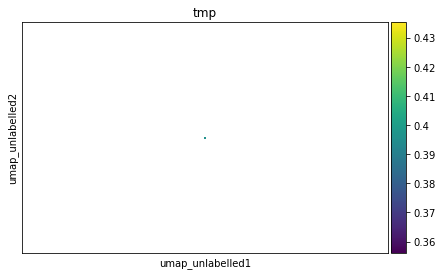

In [147]:
sc.pl.scatter(adata, basis="umap_unlabelled", color=["tmp"])

In [ ]:
sc.pl.umap()

In [51]:
adata.obs["tmp3"] = adata.obs["score_prediction_2"]

In [52]:
adata.obs[["tmp3"]] = adata.obs[["tmp3"]].fillna(0)

In [53]:
adata.obs["tmp3"]

AAACCTGAGATCCCGC-1-2-0    0.000000
AAACCTGAGCAGGTCA-1-2-0    0.000000
AAACCTGCAATGAATG-1-2-0    0.000000
AAACCTGCAATTGCTG-1-2-0    0.000000
AAACCTGCACAGAGGT-1-2-0    0.000000
                            ...   
TTTGTGTTCTTGTTCG-1-1-1    0.269939
TTTGTTGGTATTGAGT-1-1-1    0.444686
TTTGTTGGTCCTAAGA-1-1-1    0.269939
TTTGTTGGTTAACAGT-1-1-1    0.416674
TTTGTTGGTTGTTGCT-1-1-1    0.130411
Name: tmp3, Length: 37497, dtype: float64

In [50]:

np.isnan(adata.obs["score_prediction_2"])

AAACCTGAGATCCCGC-1-2-0     True
AAACCTGAGCAGGTCA-1-2-0     True
AAACCTGCAATGAATG-1-2-0     True
AAACCTGCAATTGCTG-1-2-0     True
AAACCTGCACAGAGGT-1-2-0     True
                          ...  
TTTGTGTTCTTGTTCG-1-1-1    False
TTTGTTGGTATTGAGT-1-1-1    False
TTTGTTGGTCCTAAGA-1-1-1    False
TTTGTTGGTTAACAGT-1-1-1    False
TTTGTTGGTTGTTGCT-1-1-1    False
Name: score_prediction_2, Length: 37497, dtype: bool

In [41]:
adata.obs["label_prediction_2"]

AAACCTGAGATCCCGC-1-2-0             NaN
AAACCTGAGCAGGTCA-1-2-0             NaN
AAACCTGCAATGAATG-1-2-0             NaN
AAACCTGCAATTGCTG-1-2-0             NaN
AAACCTGCACAGAGGT-1-2-0             NaN
                              ...     
TTTGTGTTCTTGTTCG-1-1-1     Ngn3 low EP
TTTGTTGGTATTGAGT-1-1-1     Ngn3 low EP
TTTGTTGGTCCTAAGA-1-1-1     Ngn3 low EP
TTTGTTGGTTAACAGT-1-1-1     Mat. Acinar
TTTGTTGGTTGTTGCT-1-1-1    Fev+ Epsilon
Name: label_prediction_2, Length: 37497, dtype: category
Categories (8, object): ['Beta', 'Delta', 'Fev+ Beta', 'Fev+ Epsilon', 'Mat. Acinar', 'Ngn3 low EP', 'Prlf. Acinar', 'secondary Alpha']

In [47]:
adata.obs["tmp_2"] = adata.obs["score_prediction_2"].astype("str")

In [38]:
adata.obs["tmp"] = adata.obs['score_prediction_2'].astype("str")

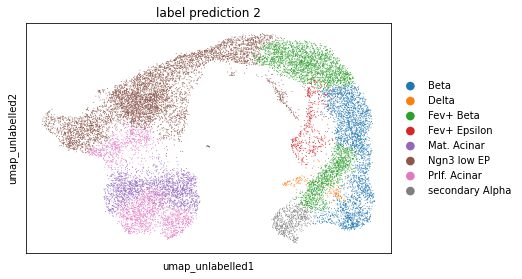

In [37]:
a = sc.pl.scatter(adata, show=False, basis="umap_unlabelled", color="label_prediction_2")

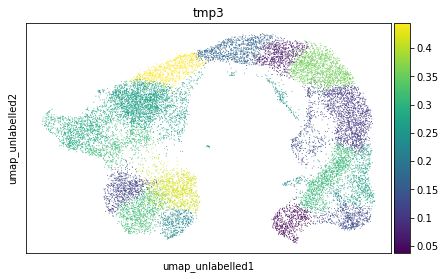

In [54]:
a = sc.pl.scatter(adata, show=False, basis="umap_unlabelled", color="tmp3")

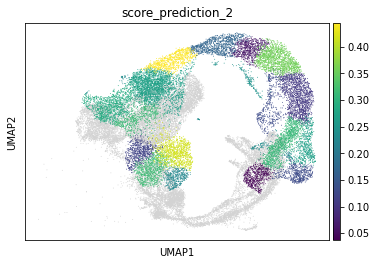

In [31]:
sc.pl.umap(adata, color="score_prediction_2")

In [56]:
adata.obs["score_prediction_1"]

AAACCTGAGATCCCGC-1-2-0         NaN
AAACCTGAGCAGGTCA-1-2-0         NaN
AAACCTGCAATGAATG-1-2-0         NaN
AAACCTGCAATTGCTG-1-2-0         NaN
AAACCTGCACAGAGGT-1-2-0         NaN
                            ...   
TTTGTGTTCTTGTTCG-1-1-1    0.646281
TTTGTTGGTATTGAGT-1-1-1    0.449448
TTTGTTGGTCCTAAGA-1-1-1    0.646281
TTTGTTGGTTAACAGT-1-1-1    0.566572
TTTGTTGGTTGTTGCT-1-1-1    0.395655
Name: score_prediction_1, Length: 37497, dtype: float64

/mnt/home/icb/dominik.klein/git_repos/moscot/moscot/problems/label_transfer/_mixins.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tmp=tm.index[np.argsort(tm.values, axis=0)[-top_k:, :]]


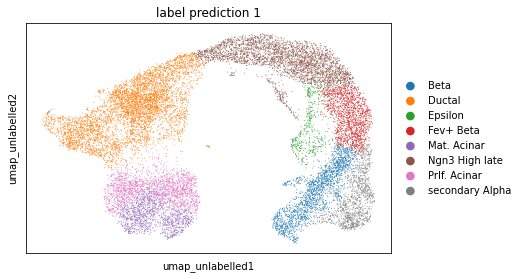

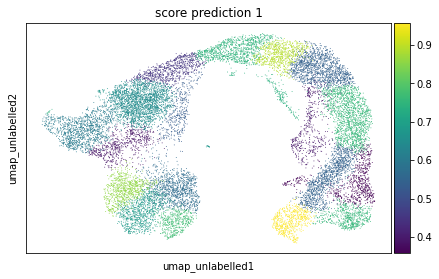

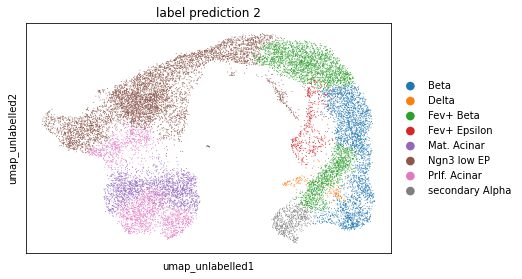

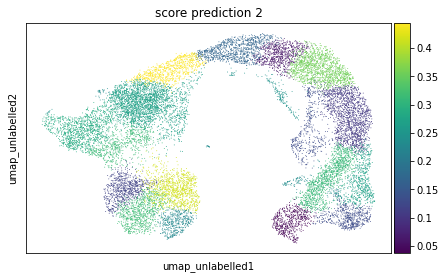

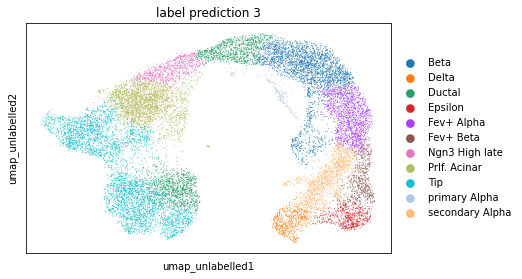

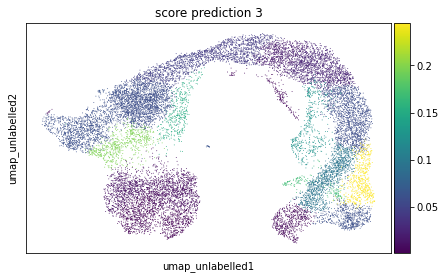

In [59]:
lp.plot_predictions(clusters_labelled="celltype", clusters_unlabelled="leiden", top_k=3, label_umap_key="umap_unlabelled")

In [66]:
#neighbors = sc.pp.neighbors(adata[adata.obs["batch"]=="1"], copy=True)

In [38]:
adata_22 = adata[adata.obs["batch"]=="1"]

In [39]:
sc.pp.neighbors(adata_22)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [40]:
sc.tl.umap(adata_22)

In [41]:
adata_22.obs["celltype"]

AAACAGCCAACAGCCT-1-0-1          Fev+ Beta
AAACAGCCAACCCTCC-1-0-1         Fev+ Alpha
AAACAGCCACCTGTAA-1-0-1        Prlf. Trunk
AAACAGCCACTAAGCC-1-0-1          Fev+ Beta
AAACAGCCAGGATAAC-1-0-1    Ngn3 High early
                               ...       
TTTGTGTTCTTGTTCG-1-1-1        Ngn3 low EP
TTTGTTGGTATTGAGT-1-1-1        Ngn3 low EP
TTTGTTGGTCCTAAGA-1-1-1        Ngn3 low EP
TTTGTTGGTTAACAGT-1-1-1        Multipotent
TTTGTTGGTTGTTGCT-1-1-1       Fev+ Epsilon
Name: celltype, Length: 16978, dtype: category
Categories (15, object): ['Acinar', 'Beta', 'Delta', 'Fev+', ..., 'Ngn3 low EP', 'Prlf. Acinar', 'Prlf. Trunk', 'secondary Alpha']

In [ ]:
adata_22.obs.loc[:, "leiden"]

In [43]:
adata_22.obs["predictions"] = adata_22.obs.apply(lambda x: preds.loc[x["leiden"], 1], axis=1)

In [44]:
adata_22.obs["predictions_confidence"] = adata_22.obs.apply(lambda x: scores.loc[int(x["leiden"]), 1], axis=1)

In [48]:
adata_22.obs.apply(lambda x: scores.loc[int(x["leiden"]), 1], axis=1)

AAACAGCCAACAGCCT-1-0-1    0.311334
AAACAGCCAACCCTCC-1-0-1    0.294553
AAACAGCCACCTGTAA-1-0-1    0.852982
AAACAGCCACTAAGCC-1-0-1    0.311334
AAACAGCCAGGATAAC-1-0-1    0.252656
                            ...   
TTTGTGTTCTTGTTCG-1-1-1    0.376237
TTTGTTGGTATTGAGT-1-1-1    0.324184
TTTGTTGGTCCTAAGA-1-1-1    0.376237
TTTGTTGGTTAACAGT-1-1-1    0.885252
TTTGTTGGTTGTTGCT-1-1-1    0.193085
Length: 16978, dtype: float64

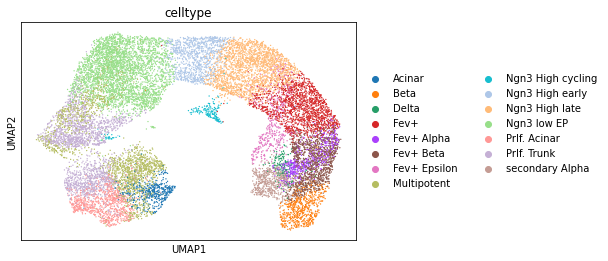

In [89]:
sc.pl.umap(adata_22, color="celltype")

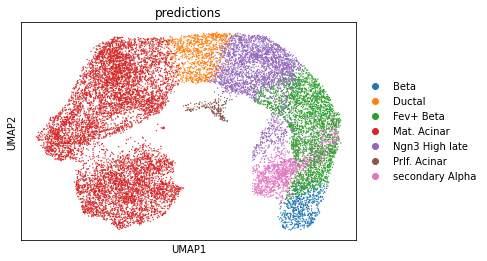

In [46]:
sc.pl.umap(adata_22, color="predictions")

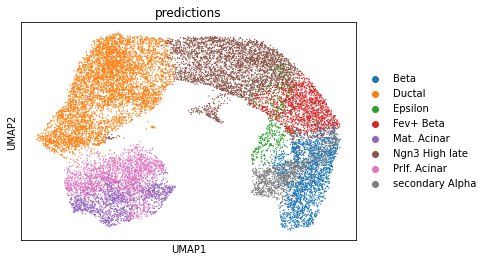

In [90]:
# linear
sc.pl.umap(adata_22, color="predictions")

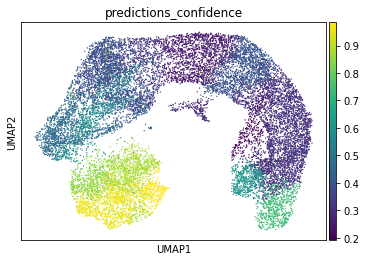

In [47]:
sc.pl.umap(adata_22, color="predictions_confidence")

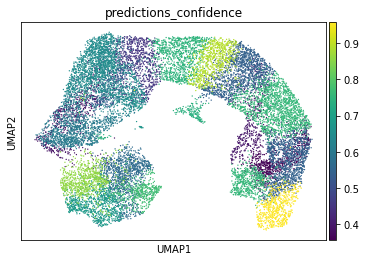

In [98]:
# linaer
sc.pl.umap(adata_22, color="predictions_confidence")